In [2]:
!pip install netCDF4
!pip install  basemap
!pip install cartopy
!pip install rioxarray
!pip install rasterio
!pip install earthpy

In [3]:
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import xarray as xr

%matplotlib inline
from matplotlib import animation
import cartopy.crs as ccrs
from IPython.display import HTML

import rioxarray as rxr
from rasterio.warp import transform_bounds
import rasterio as rio
from rasterio.plot import show

import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

In [4]:
#Start by connecting gdrive into the google colab - make sure to connect to your colby account
#log in and allow access - this means we can read & Save data to google drive.
from google.colab import drive

drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [5]:
#now let's import python libraries
import numpy as np
import pandas as pd
from osgeo import osr, ogr, gdal #we could try geopandas
import geopandas as gpd #using
from shapely.geometry import Polygon, shape, MultiPolygon

from skimage import morphology #if we wnated to play a bit more with how water bodies are identified
from skimage.measure import label, regionprops_table, find_contours#, points_in_poly, regionprops_table


In [6]:
%cd /content/gdrive/MyDrive/Colby_Honors_Thesis
%ls

/content/gdrive/MyDrive/Colby_Honors_Thesis
'Ashley Ren Honors Thesis Checklist.gdoc'  'Manaus Oct27_psscene_analytic_8b_sr_udm2.zip'
 comb_plot.ipynb                           'McKinney MCA Text Only Submitted.pdf'
'Copy of GRC 2022 Presentation.pptx'        Plot_SatEmissions/
 data/                                     'Research Progress.gslides'
 forest_height.ipynb                       'super resolution'/


In [ ]:


# # 8 bands
# satellite = rxr.open_rasterio("data/Manaus Oct27_psscene_analytic_8b_sr_udm2/composite.tif")
# satellite

### Read the data

In [ ]:
fn = 'Plot_SatEmissions/CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_2022.nc'
ds = xr.open_dataset(fn, decode_times=True, decode_coords="all")
dsa = ds.rio.write_crs('EPSG:4326')

In [ ]:
dsaa = dsa['emiss_bio']
dsaa

<xarray.DataArray 'emiss_bio' (time: 12, lat: 720, lon: 1440)>
[12441600 values with dtype=float32]
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
  * lat          (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75
  * lon          (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
    spatial_ref  int64 0
Attributes:
    standard_name:           tendency_of_atmosphere_mass_content_of_isoprene_...
    sector_name:             Biogenic
    molecular_weight:        68.0
    molecular_weight_units:  g mole-1
    cell_methods:            TSTEP: mean time: mean
    long_name:               isoprene        
    units:                   kg m-2 s-1

## Plot the data

In [ ]:
dsaa2 = dsaa.where(dsaa > 0)
dsaa2

<xarray.DataArray 'emiss_bio' (time: 12, lat: 720, lon: 1440)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
  * lat          (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75
  * lon          (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
    spatial_ref  int64 0
Attributes:
    standard_name:           tendency_of_atmosphere_mass_content_of_isoprene_...
    sector_name:             Biogenic
    molecular_weight:        68.0
    molecular_weight_units:  g mole-1
    cell_methods:            TSTEP: mean time: mean
    long_name:               isoprene        
    units:                   kg m-2 s-1

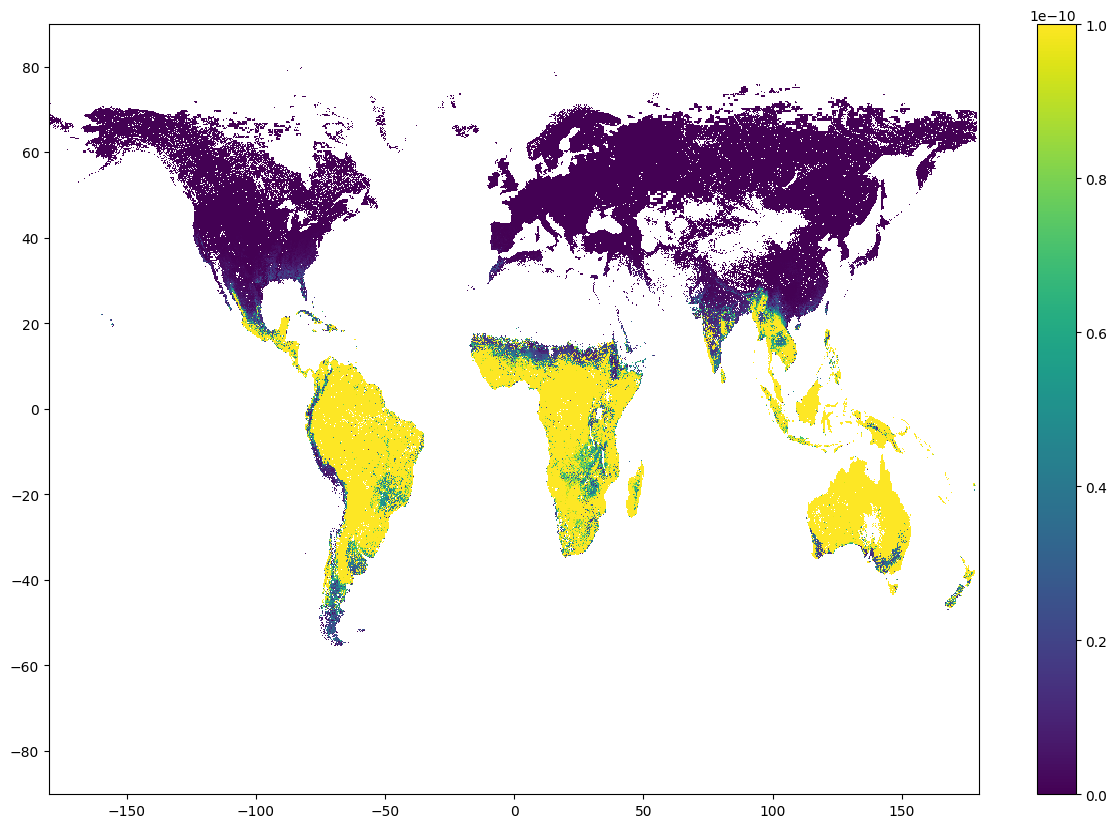

In [ ]:
# create the figure panel and specify size
fig, ax = plt.subplots(figsize=(15, 10))


# Plot the data
im = plt.pcolormesh(dsaa2.lon, dsaa2.lat, dsaa2[0,:,:],vmax=1e-10)
plt.colorbar(im)

### Plot Emissions

### Plot satellite

In [ ]:
from PIL import Image
im = Image.open('data/manaus.jpg')
im.save("data/manaus.tif")

In [36]:
# rgb
rgb = rxr.open_rasterio("data/manaus.tif")
rgb.shape
rgb

/usr/local/lib/python3.10/dist-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


<xarray.DataArray (band: 3, y: 1134, x: 1512)>
[5143824 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 0.5 1.5 2.5 3.5 ... 1.51e+03 1.51e+03 1.512e+03
  * y            (y) float64 0.5 1.5 2.5 3.5 ... 1.132e+03 1.132e+03 1.134e+03
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [ ]:
rgb_fp = r'data/manaus_tower.tiff'
rgb_manaus = rio.open(rgb_fp)
rgb_manaus2 = rgb_manaus.read()
type(rgb_manaus2)
# fig, ax = plt.subplots(2,2)
# ax[0][0]
# ax[0,0].imshow(rgb_manaus,vmin=0,vmax=255)
# ax[0,1].imshow(rgb_manaus,vmin=0,vmax=255)
# ax[1,0].imshow(rgb_manaus,vmin=0,vmax=255)
# ax[1,1].imshow(rgb_manaus,vmin=0,vmax=255)
# ax[0][0]
# ax[0,0].imshow(rgb.isel(band=0),vmin=0,vmax=255)
# ax[0,1].imshow(rgb.isel(band=1),vmin=0,vmax=255)
# ax[1,0].imshow(rgb.isel(band=2),vmin=0,vmax=255)
# ax[1,1].imshow(rgb.isel(band=3),vmin=0,vmax=255)

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


numpy.ndarray

In [ ]:
dfile = None
dfile = gdal.Open('Manaus_Oct27_psscene_analytic_8b_sr_udm2/composite.tif')

#create an array for each band of the image
cb = dfile.GetRasterBand(1).ReadAsArray() #gdal indexes from 1
b = dfile.GetRasterBand(2).ReadAsArray()
g = dfile.GetRasterBand(3).ReadAsArray()
g2 = dfile.GetRasterBand(4).ReadAsArray()
y = dfile.GetRasterBand(5).ReadAsArray()
r = dfile.GetRasterBand(6).ReadAsArray()
re = dfile.GetRasterBand(7).ReadAsArray()
nir = dfile.GetRasterBand(8).ReadAsArray()

dd = {'coastal blue':cb, 'blue':b,'green I': g,
      'green II': g2, 'yellow': y, 'red':r, 'red edge':re,
      'near infrared': nir}

In [ ]:
dfile = None
dfile = gdal.Open('data/manaus_tower.tiff')

#create an array for each band of the image
b = dfile.GetRasterBand(1).ReadAsArray() #gdal indexes from 1
g = dfile.GetRasterBand(2).ReadAsArray()
r = dfile.GetRasterBand(3).ReadAsArray()
# nir = dfile.GetRasterBand(4).ReadAsArray()


dd4 = {'blue':b,'green': g,
      'red':r}

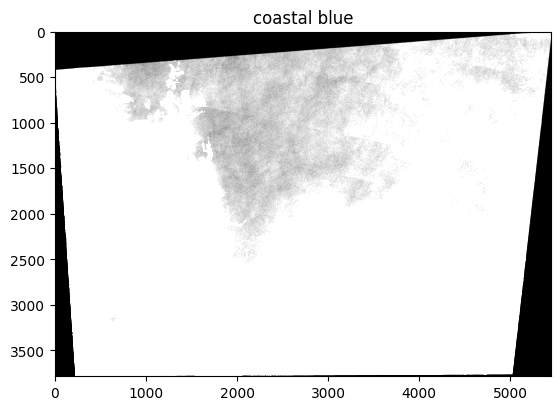

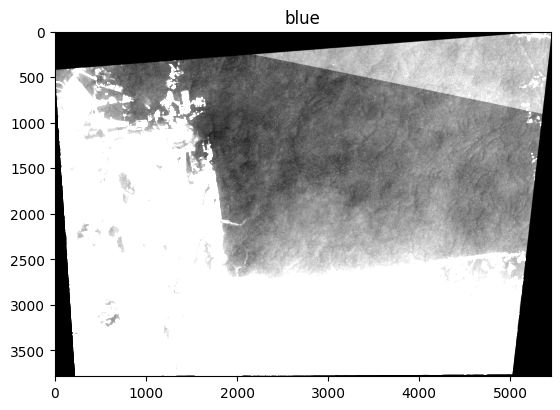

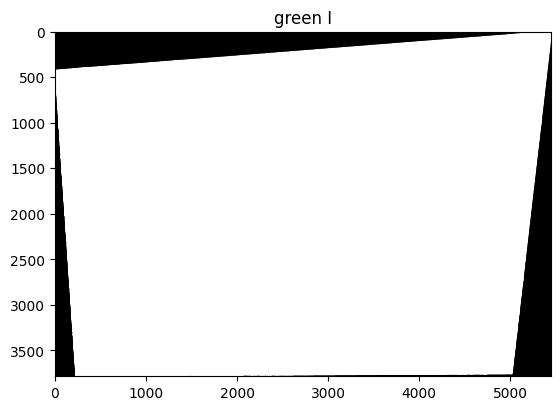

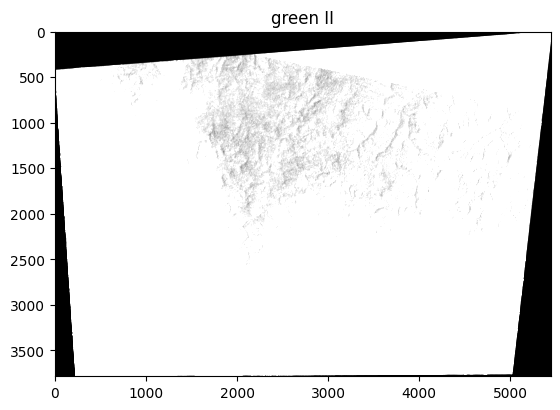

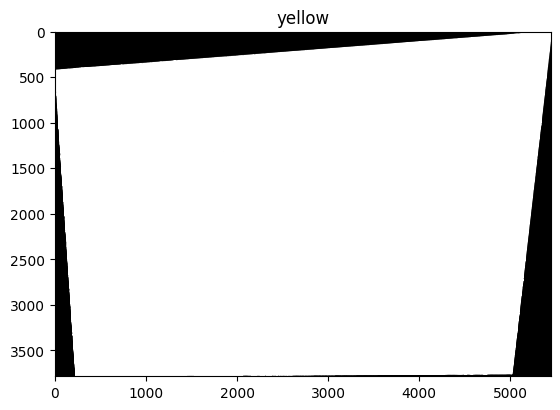

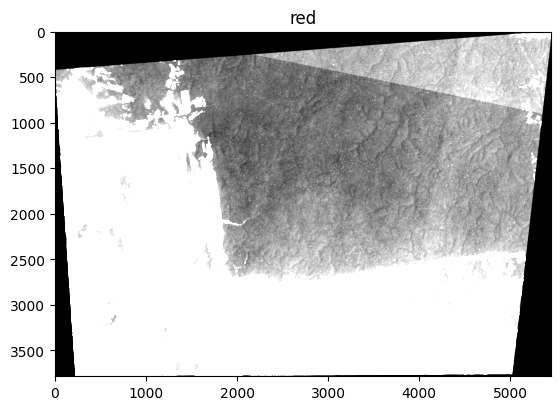

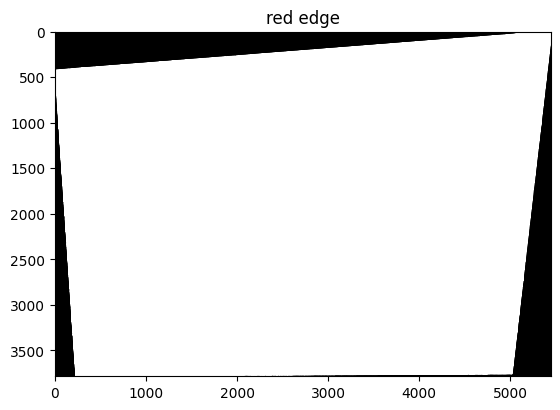

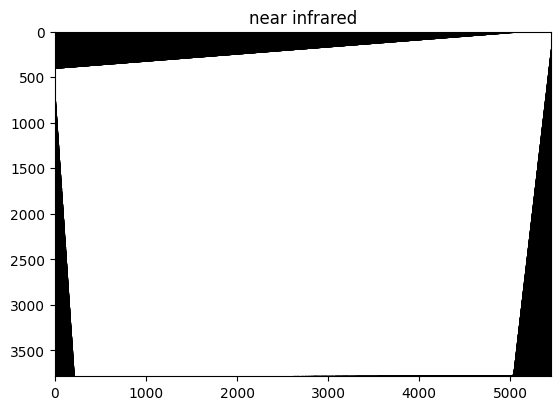

In [ ]:
for i, k in enumerate(dd):
  plt.figure()
  plt.imshow(dd[k],cmap='gray',vmin=0,vmax=255)
  plt.title(k)

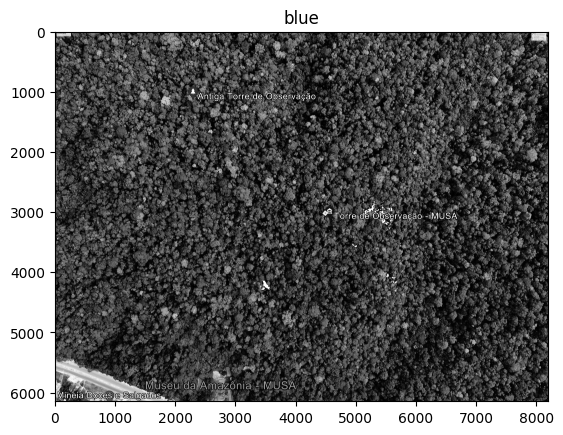

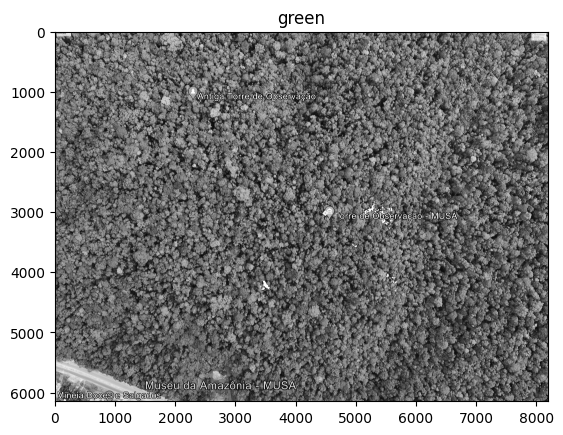

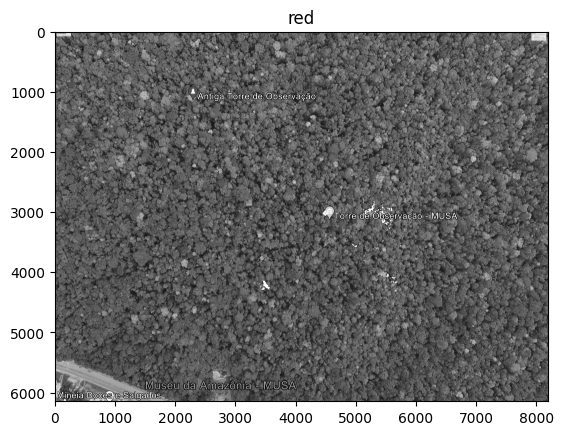

In [ ]:
for i, k in enumerate(dd4):
  plt.figure()
  plt.imshow(dd4[k],cmap='gray',vmin=0,vmax=255)
  plt.title(k)

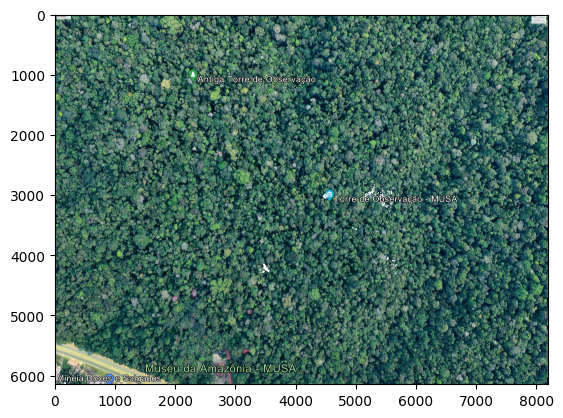

In [ ]:
im = np.dstack((dd4['blue']/dd4['blue'].max(),dd4['green']/dd4['green'].max(),dd4['red']/dd4['red'].max()))
plt.imshow(im)
# plt.imshow(dd['near infrared'])

In [ ]:
dd4['red'].max()

12740

In [ ]:
dfile = None
dfile = gdal.Open('Manaus_Oct27_3_psscene_visual/composite.tif')

#create an array for each band of the image
b = dfile.GetRasterBand(1).ReadAsArray() #gdal indexes from 1
g = dfile.GetRasterBand(2).ReadAsArray()
r = dfile.GetRasterBand(3).ReadAsArray()
nir = dfile.GetRasterBand(4).ReadAsArray()


ddrgb = {'blue':b,'green': g,
      'red':r, 'near infrared': nir}

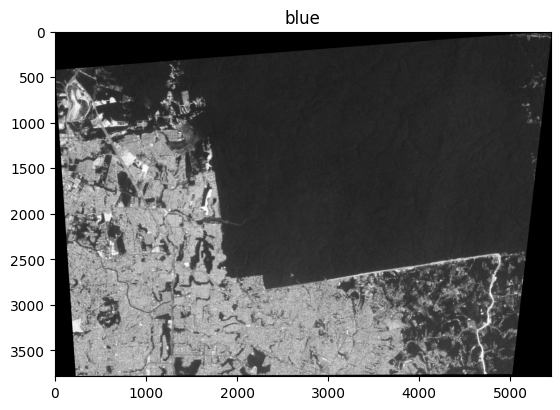

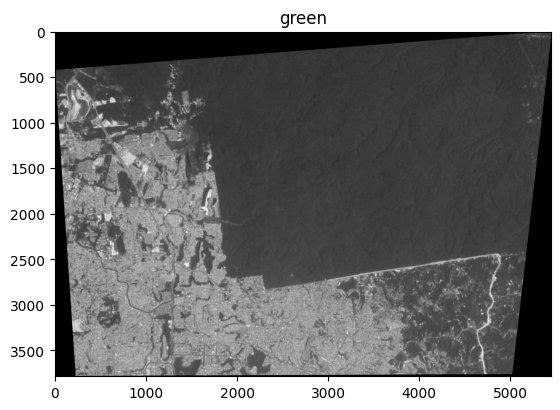

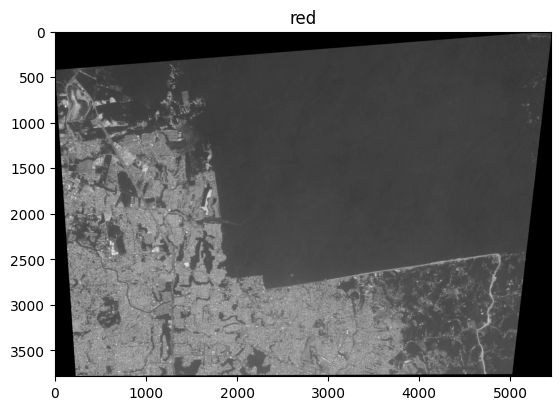

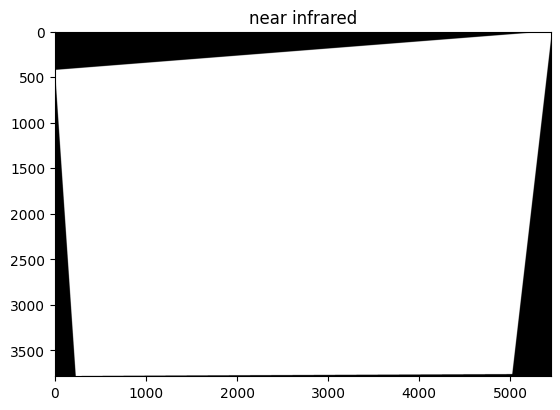

In [ ]:
for i, k in enumerate(ddrgb):
  plt.figure()
  plt.imshow(ddrgb[k],cmap='gray',vmin=0,vmax=255)
  plt.title(k)

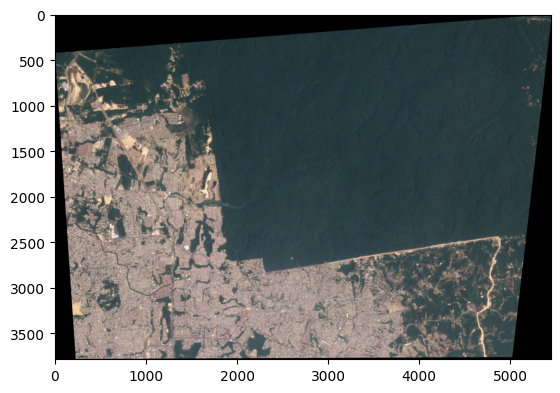

In [ ]:
im = np.dstack((ddrgb['blue']/ddrgb['blue'].max(),ddrgb['green']/ddrgb['green'].max(),ddrgb['red']/ddrgb['red'].max()))
plt.imshow(im)
# plt.imshow(dd['near infrared'])

/usr/local/lib/python3.10/dist-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


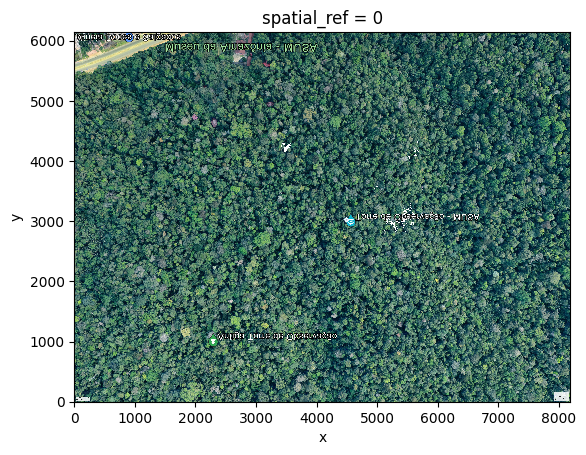

In [8]:
rgb2 = rxr.open_rasterio('data/manaus_tower.tif')
rgb2.rio.bounds()
# a = np.dstack((rgb2.isel(band=0)/rgb2.isel(band=0).values.max(),
#                rgb2.isel(band=1)/rgb2.isel(band=1).values.max(),
#                rgb2.isel(band=2)/rgb2.isel(band=2).values.max()))
# rgb2
# ep.plot_rgb(rgb2.values,rgb=[0,1,2]) #this works but doesn't have lat/long displayed
rgb2.plot.imshow()

In [ ]:
#NOW TO ACTUALLY PLOT!!!
'''
1. Import data
2. Set data crs (projection)
3. Convert (reproject) data to the same CRS
4. Get limits for axes (maybe clip data?)
5. Plot on top of each other
'''

rgb_crs = es.crs_check('data/manaus_tower.tiff')
cams_data_path = 'Plot_SatEmissions/CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_2022.nc'
ds = xr.open_dataset(cams_data_path, decode_coords="all")
da = ds['emiss_bio']

#add in projection
d2 = da.rio.write_crs('EPSG:4326', inplace=True)
#reproject!!
d3 = d2.rio.reproject(rgb_crs)
#get limits
lon_min, lat_min, lon_max, lat_max = rgb2.rio.bounds()

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


ValueError: No CRS found in data. The raster may not have one.

In [9]:
# rgb
rgb = rxr.open_rasterio("Plot_SatEmissions/manaus_oct27_rgb_psscene_visual/composite.tif")
rgb.shape
rgb

<xarray.DataArray (band: 4, y: 1035, x: 1367)>
[5659380 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 1.68e+05 1.68e+05 1.68e+05 ... 1.721e+05 1.721e+05
  * y            (y) float64 9.669e+06 9.669e+06 ... 9.666e+06 9.666e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:     Area
    TIFFTAG_DATETIME:  2023:10:27 13:31:11
    scale_factor:      1.0
    add_offset:        0.0

In [10]:
rgb2 = rxr.open_rasterio('Plot_SatEmissions/Manaus_Oct27_3_psscene_visual/composite.tif')
rgb2.rio.bounds()
# a = np.dstack((rgb2.isel(band=0)/rgb2.isel(band=0).values.max(),
#                rgb2.isel(band=1)/rgb2.isel(band=1).values.max(),
#                rgb2.isel(band=2)/rgb2.isel(band=2).values.max()))
# rgb2
# ep.plot_rgb(rgb2.values,rgb=[0,1,2]) #this works but doesn't have lat/long displayed
# rgb2.plot.imshow()

(164292.0, 9663966.0, 180633.0, 9675321.0)

In [11]:
height = rxr.open_rasterio("data/Forest_height_2019_SAM.tif")
height.shape
height.rio.bounds()

(-88.0005, -56.000499999999995, -33.999500000000005, 13.0005)

In [ ]:
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:32721", "EPSG:4326")
transformer.transform(180633.0, 9675321.0)

(-2.933737501870306, -59.872605890674315)

In [21]:
!pip install pycrs


  Preparing metadata (setup.py) ... done
  Created wheel for pycrs: filename=PyCRS-1.0.2-py3-none-any.whl size=32688 sha256=e6318ce23b6738828a482be259af4596818317ce510fe16dec3bf6c56245a4ec
  Stored in directory: /root/.cache/pip/wheels/47/1d/70/7a5bdf33347e7c75e95b06b1fa38f076a59a9506653cc24aff
Successfully built pycrs


In [29]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs

fp = 'data/Forest_height_2019_SAM.tif'
output_tif_path = 'data/manaus_height.tif'

data = rasterio.open(fp)

bbox = box(-3.035934502691683, -60.01973432759909, -2.933737501870306, -59.872605890674315)

geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))

geo = geo.to_crs(crs=data.crs.data)

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

coords = getFeatures(geo)
print(coords)

out_img, out_transform = mask(data, coords, crop=True)

[{'type': 'Polygon', 'coordinates': [[[-2.933737501870306, -60.01973432759909], [-2.933737501870306, -59.872605890674315], [-3.035934502691683, -59.872605890674315], [-3.035934502691683, -60.01973432759909], [-2.933737501870306, -60.01973432759909]]]}]


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


ValueError: Input shapes do not overlap raster.

In [32]:
!gdalwarp -te -3.035934502691683, -60.01973432759909, -2.933737501870306, -59.872605890674315 data/Forest_height_2019_SAM.tif data/manaus_height.tif

/bin/bash: line 1: gdalwarp: command not found


In [19]:
# lon_min, lat_min, lon_max, lat_max = rgb2.rio.bounds()
window = (-3.035934502691683, -60.01973432759909, -2.933737501870306, -59.872605890674315)

gdal.Translate('data/manaus_height.tif', 'data/Forest_height_2019_SAM.tif', projWin = window)
# window

In [8]:
rgb_crs1 = es.crs_check('Plot_SatEmissions/Manaus_Oct27_3_psscene_visual/composite.tif')
rgb_crs1

CRS.from_epsg(32721)

In [12]:
# rds_4326 = rds.rio.reproject("EPSG:4326")
height_crs = es.crs_check('data/Forest_height_2019_SAM.tif')
height_crs
# height1 = height.rio.reproject(rgb_crs1)

CRS.from_epsg(4326)

In [35]:
rgb_crs1 = es.crs_check('Plot_SatEmissions/manaus_oct27_rgb_psscene_visual/composite.tif')
cams_data_path = 'Plot_SatEmissions/CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_2022.nc'
ds = xr.open_dataset(cams_data_path, decode_coords="all")
da = ds['emiss_bio']
da

<xarray.DataArray 'emiss_bio' (time: 12, lat: 720, lon: 1440)>
[12441600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.0 89.25 89.5 89.75
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
Attributes:
    standard_name:           tendency_of_atmosphere_mass_content_of_isoprene_...
    sector_name:             Biogenic
    molecular_weight:        68.0
    molecular_weight_units:  g mole-1
    cell_methods:            TSTEP: mean time: mean
    long_name:               isoprene        
    units:                   kg m-2 s-1

(164292.0, 180633.0, 9663966.0, 9675321.0)

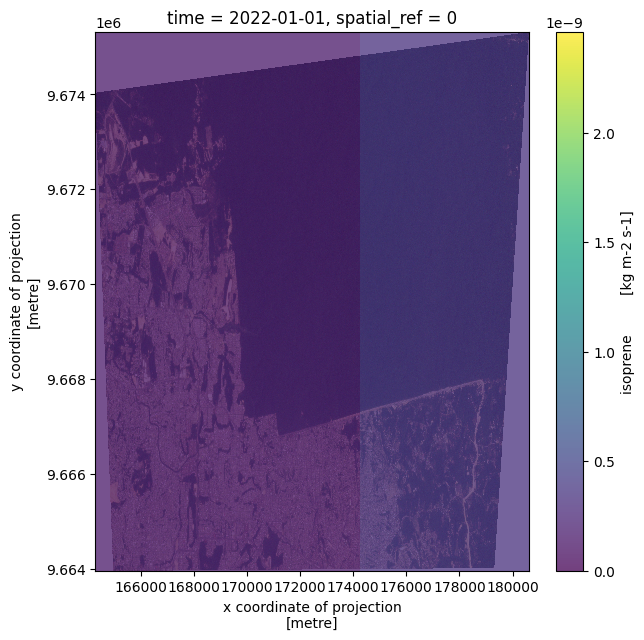

In [ ]:
rgb_crs1 = es.crs_check('manaus_oct27_rgb_psscene_visual/composite.tif')
cams_data_path = 'CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_2022.nc'
ds = xr.open_dataset(cams_data_path, decode_coords="all")
da = ds['emiss_bio']

#add in projection
d2 = da.rio.write_crs('EPSG:4326', inplace=True)
#reproject!!
d3 = d2.rio.reproject(rgb_crs1)
#get limits
lon_min, lat_min, lon_max, lat_max = rgb2.rio.bounds()

fig, ax = plt.subplots(figsize=(7,7))
rgb2.plot.imshow(ax=ax)
d3.isel(time=0).plot(ax=ax,alpha=.75)
ax.axis([lon_min, lon_max, lat_min, lat_max])

(164292.0, 180633.0, 9663966.0, 9675321.0)

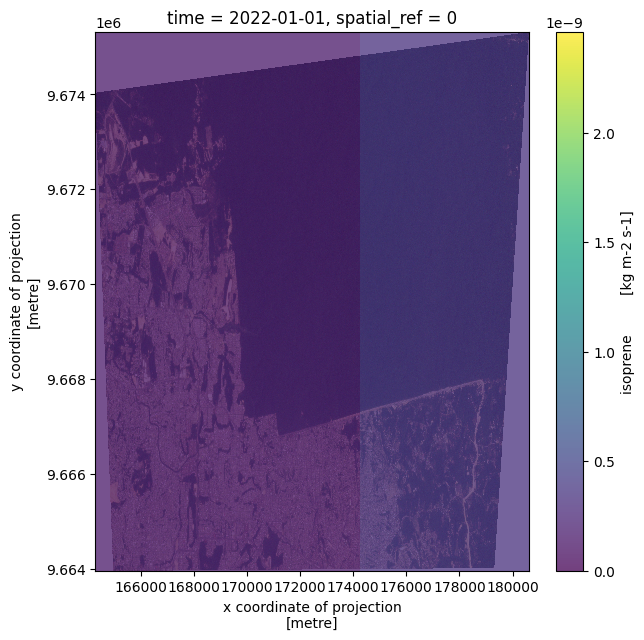

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
rgb2.plot.imshow(ax=ax)
d3.isel(time=0).plot(ax=ax,alpha=.75)
ax.axis([lon_min, lon_max, lat_min, lat_max])
#alpha here sets the translucence (from 0 - completely transparent to 1 completely opaque)